In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\tuning.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Sampling_Data\Smote_dataset.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19350 entries, 0 to 19349
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           19350 non-null  int64  
 1   id                   19350 non-null  float64
 2   ref                  19350 non-null  float64
 3   subtitle             19350 non-null  float64
 4   creatorname          19350 non-null  float64
 5   totalbytes           19350 non-null  float64
 6   lastupdated          19350 non-null  float64
 7   downloadcount        19350 non-null  float64
 8   title                19350 non-null  float64
 9   tags                 19350 non-null  float64
 10  anomaly              19350 non-null  float64
 11  download_view_ratio  19350 non-null  float64
 12  num_tags             19350 non-null  float64
 13  title_length         19350 non-null  float64
 14  subtitle_length      19350 non-null  float64
 15  creator_popularity   19350 non-null 

# Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X va y ajratish
X = df.drop(columns="cluster")
y = df["cluster"]

# Train / Test ajratish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model yaratish
log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train, y_train)

# Bashorat
y_pred = log_model.predict(X_test)

# Baholash
print("📊 Logistic Regression natijalari:")
print("Accuracy:", accuracy_score(y_test, y_pred))

📊 Logistic Regression natijalari:
Accuracy: 0.9795865633074935


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree Classifier 

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X va y ajratish
X = df.drop(columns="cluster")
y = df["cluster"]

# Train / Test ajratish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model yaratish (default sozlamalar bilan)
dt_model = DecisionTreeClassifier()

# O‘qitish
dt_model.fit(X_train, y_train)

# Bashorat
y_pred = dt_model.predict(X_test)

# Natijalar
print("🌳 Decision Tree Classifier natijalari:")
print("Accuracy:", accuracy_score(y_test, y_pred))

🌳 Decision Tree Classifier natijalari:
Accuracy: 0.9984496124031008


# Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns="cluster")
y = df["cluster"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf_model = RandomForestClassifier()  # default sozlamalar
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9992248062015504


# XGBClassifier

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ma'lumotlarni tayyorlash
X = df.drop(columns="cluster")
y = df["cluster"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# XGBoost modelini yaratish
xgb_model = XGBClassifier(
    n_estimators=100,       # daraxtlar soni
    learning_rate=0.1,      # o‘rganish tezligi
    max_depth=6,            # har bir daraxt maksimal chuqurligi
    random_state=42,
    use_label_encoder=False, # XGBoost >=1.6 uchun kerak
    eval_metric='mlogloss'   # ko‘p klassli klassifikatsiya uchun
)

# Modelni fit qilish
xgb_model.fit(X_train, y_train)

# Bashorat qilish
y_pred = xgb_model.predict(X_test)

# Natijani baholash
print("Accuracy:", accuracy_score(y_test, y_pred))


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:54:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9989664082687338


# HYPERPARAMETER TUNING 

# MANUAL SEARCH 

#  RandomForestClassifier + Manual Search

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 🧩 Model (qo‘lda hyperparameterlar bilan)
rf_manual = RandomForestClassifier(
    n_estimators=2,    # daraxtlar soni
    max_depth=5,       # maksimal chuqurlik
    random_state=42
)

# O‘qitish
rf_manual.fit(X_train, y_train)

# Bashorat
y_pred_manual = rf_manual.predict(X_test)

# Baholash
r2_manual = accuracy_score(y_test, y_pred_manual)
print("🌲 Random Forest (Manual Search) Accuracy:", r2_manual)

🌲 Random Forest (Manual Search) Accuracy: 0.9330749354005168


#  DecisionTreeClassifier + Manual Search

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 🌳 Model — qo‘lda tanlangan hyperparametrlar bilan
dt_manual = DecisionTreeClassifier(
    criterion="entropy",   # yoki "gini"
    max_depth=5,           # maksimal chuqurlik
    min_samples_split=4,   # bo‘linish uchun minimal namunalar
    random_state=42
)

# O‘qitish
dt_manual.fit(X_train, y_train)

# Bashorat
y_pred_manual = dt_manual.predict(X_test)

# Baholash
acc_manual = accuracy_score(y_test, y_pred_manual)
print("🌳 Decision Tree (Manual Search) Accuracy:", acc_manual)


🌳 Decision Tree (Manual Search) Accuracy: 0.993798449612403


#  LogisticRegression + Manual Search


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



log_manual = LogisticRegression(
    solver="liblinear",   # kichik datasetlar uchun yaxshi
    penalty="l2",         # regularizatsiya turi ("l1" yoki "l2")
    C=0.7,                # regularizatsiya kuchi (kichik bo‘lsa — ko‘proq jazo)
    max_iter=500,         # iteratsiyalar soni
    random_state=42
)

# Modelni o‘qitish
log_manual.fit(X_train, y_train)

# Bashorat
y_pred_manual = log_manual.predict(X_test)

# Baholash
acc_manual = accuracy_score(y_test, y_pred_manual)
print("📊 Logistic Regression (Manual Search) Accuracy:", acc_manual)

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


📊 Logistic Regression (Manual Search) Accuracy: 0.98656330749354


#  XGBClassifier + Manual Search


In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ma'lumotlarni tayyorlash
X = df.drop(columns="cluster")
y = df["cluster"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# XGBoost modelini yaratish
xgb_manual = XGBClassifier(
    n_estimators=100,        # daraxtlar soni
    learning_rate=0.1,       # o‘rganish tezligi
    max_depth=6,             # daraxt maksimal chuqurligi
    reg_lambda=0.7,          # L2 regularizatsiya (LogisticRegressiondagi C ga o‘xshash)
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Modelni o‘qitish
xgb_manual.fit(X_train, y_train)

# Bashorat qilish
y_pred_manual = xgb_manual.predict(X_test)

# Baholash
acc_manual = accuracy_score(y_test, y_pred_manual)
print("📊 XGBoost Classifier Accuracy:", acc_manual)


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:55:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost Classifier Accuracy: 0.9989664082687338


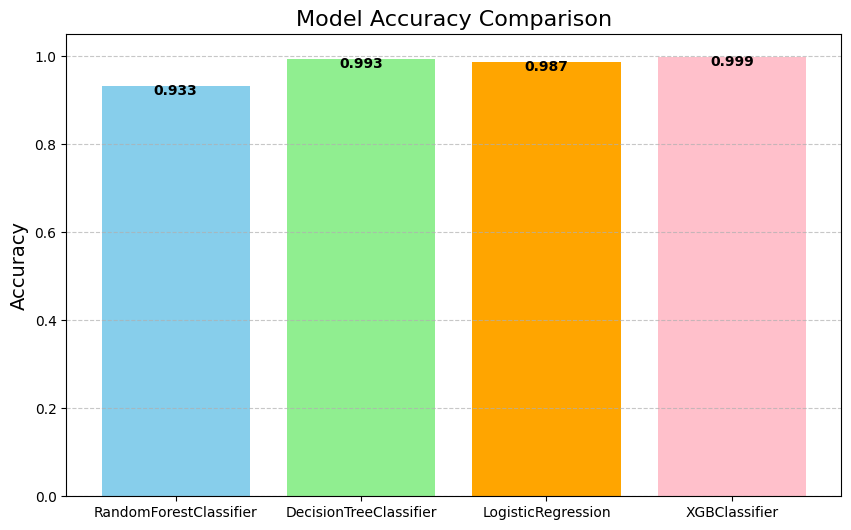

In [11]:
import matplotlib.pyplot as plt
import os

# Natijalar
models = [
    "RandomForestClassifier",
    "DecisionTreeClassifier",
    "LogisticRegression",
    "XGBClassifier"
]
accuracy = [0.9330749354005168, 0.99334005168, 0.98656330, 0.9989664082687338]

# Rasm hajmini sozlash
plt.figure(figsize=(10, 6))

# Bar chart
bars = plt.bar(models, accuracy, color=['skyblue', 'lightgreen', 'orange', 'pink'])

# Accuracy qiymatlarni ustiga yozish
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.02, 
             f"{acc:.3f}", ha='center', color='black', fontweight='bold')

# Grafik sarlavhasi va o'qlar
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0, 1.05)  # y o'qi 0-1 orasida bo'lsin
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Faylni saqlash
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Results\Manual_Search_Tuning.jpg"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()


# GRID SEARCH 

# RandomForestClassifier + Grid Search

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)

# 🔍 Grid Search uchun parametrlar to‘plami
param_grid = {
    'n_estimators': [50, 100, 150],     # daraxtlar soni
    'max_depth': [None, 5, 10, 15],     # daraxt chuqurligi
    'min_samples_split': [2, 5, 10],    # bo‘linish uchun minimal namunalar
    'min_samples_leaf': [1, 2, 4],      # barg tugunlari uchun minimal namunalar
    'criterion': ['gini', 'entropy']    # ajratish mezoni
}

# 🧠 Grid Search sozlash
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross validation
    scoring='accuracy',     # aniqlikni baholash mezoni
    n_jobs=-1,              # barcha yadroda bajarish
    verbose=2               # jarayonni ko‘rsatish
)

# 🔧 Modelni o‘qitish (eng yaxshi parametrlarni topish)
grid_search.fit(X_train, y_train)

# 🏆 Eng yaxshi model va parametrlar
print("✅ Eng yaxshi parametrlar:")
print(grid_search.best_params_)

# Eng yaxshi modelni olish
best_rf = grid_search.best_estimator_

# Bashorat
y_pred = best_rf.predict(X_test)

# 📊 Natijalar
print("\n📈 Random Forest (Grid Search) Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
✅ Eng yaxshi parametrlar:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

📈 Random Forest (Grid Search) Accuracy: 0.9989664082687338

🔍 To‘liq tahlil:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       774
           1       1.00      1.00      1.00       774
           2       1.00      1.00      1.00       774
           3       1.00      1.00      1.00       774
           4       1.00      1.00      1.00       774

    accuracy                           1.00      3870
   macro avg       1.00      1.00      1.00      3870
weighted avg       1.00      1.00      1.00      3870



#  DecisionTreeClassifier + Grid Search

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


dt_model = DecisionTreeClassifier(random_state=42)

# 🔍 Grid Search uchun parametrlar to‘plami
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # bo‘linish mezoni
    'max_depth': [None, 5, 10, 20, 30],             # daraxt chuqurligi
    'min_samples_split': [2, 5, 10],                # tugunni bo‘lish uchun minimal namunalar
    'min_samples_leaf': [1, 2, 4],                  # barg tugun uchun eng kam namunalar
    'splitter': ['best', 'random']                  # tugun ajratish usuli
}

# 🧠 Grid Search sozlash
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# 🔧 Modelni o‘qitish
grid_search.fit(X_train, y_train)

# 🏆 Eng yaxshi parametrlar
print("✅ Eng yaxshi parametrlar:")
print(grid_search.best_params_)

# Eng yaxshi modelni olish
best_dt_model = grid_search.best_estimator_

# Bashorat
y_pred = best_dt_model.predict(X_test)

# 📊 Natijalar
print("\n🌳 Decision Tree (Grid Search) Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
✅ Eng yaxshi parametrlar:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

🌳 Decision Tree (Grid Search) Accuracy: 0.9987080103359173

🔍 To‘liq tahlil:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       774
           1       1.00      1.00      1.00       774
           2       1.00      1.00      1.00       774
           3       1.00      1.00      1.00       774
           4       1.00      1.00      1.00       774

    accuracy                           1.00      3870
   macro avg       1.00      1.00      1.00      3870
weighted avg       1.00      1.00      1.00      3870



#  Logistic Regression + Grid Search

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 🔍 Grid Search uchun parametrlar to‘plami
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # jarima turi
    'C': [0.01, 0.1, 1, 10, 100],                 # regularizatsiya kuchi
    'solver': ['lbfgs', 'liblinear', 'saga'],     # optimallashtirish algoritmi
}

# 🧠 Grid Search sozlash
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',     # aniqlik mezoni
    n_jobs=-1,              # barcha CPU yadrolarida bajarish
    verbose=2
)

# 🔧 O‘qitish
grid_search.fit(X_train, y_train)

# 🏆 Eng yaxshi parametrlar
print("✅ Eng yaxshi parametrlar:")
print(grid_search.best_params_)

# Eng yaxshi modelni olish
best_log_model = grid_search.best_estimator_

# Bashorat
y_pred = best_log_model.predict(X_test)

# 📊 Natijalar
print("\n📈 Logistic Regression (Grid Search) Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
125 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Rasulbek907\Desktop\Project_MP\mpv

✅ Eng yaxshi parametrlar:
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

📈 Logistic Regression (Grid Search) Accuracy: 0.99328165374677

🔍 To‘liq tahlil:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       774
           1       0.99      0.99      0.99       774
           2       1.00      1.00      1.00       774
           3       1.00      1.00      1.00       774
           4       0.99      1.00      1.00       774

    accuracy                           0.99      3870
   macro avg       0.99      0.99      0.99      3870
weighted avg       0.99      0.99      0.99      3870



c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# XGBClassifier + Grid Search CV

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# XGBoost modelini yaratish
xgb_clf = XGBClassifier(
    use_label_encoder=False,  # XGBoost >=1.6 uchun kerak
    eval_metric='mlogloss',
    random_state=42
)

# 🔍 Grid Search uchun parametrlar to‘plami
param_grid = {
    'n_estimators': [50, 100, 200],       # daraxtlar soni
    'max_depth': [3, 5, 7],               # daraxt maksimal chuqurligi
    'learning_rate': [0.01, 0.1, 0.2],   # o‘rganish tezligi
    'subsample': [0.6, 0.8, 1.0],        # har bir daraxt uchun ma'lumot ulushi
    'colsample_bytree': [0.6, 0.8, 1.0], # xususiyatlar ulushi
    'gamma': [0, 0.1, 0.2]               # minimal loss reduction
}

# 🧠 Grid Search sozlash
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',     # aniqlik mezoni
    n_jobs=-1,              # barcha CPU yadrolarida bajarish
    verbose=2
)

# 🔧 O‘qitish
grid_search.fit(X_train, y_train)

# 🏆 Eng yaxshi parametrlar
print("✅ Eng yaxshi parametrlar:")
print(grid_search.best_params_)

# Eng yaxshi modelni olish
best_xgb_model = grid_search.best_estimator_

# Bashorat
y_pred = best_xgb_model.predict(X_test)

# 📊 Natijalar
print("\n📈 XGBoost Classifier (Grid Search) Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:27:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Eng yaxshi parametrlar:
{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}

📈 XGBoost Classifier (Grid Search) Accuracy: 0.9997416020671834

🔍 To‘liq tahlil:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       774
           1       1.00      1.00      1.00       774
           2       1.00      1.00      1.00       774
           3       1.00      1.00      1.00       774
           4       1.00      1.00      1.00       774

    accuracy                           1.00      3870
   macro avg       1.00      1.00      1.00      3870
weighted avg       1.00      1.00      1.00      3870



# RANDOM SEARCH 

# RandomForestClasssifier + Random Search

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# 🔹 Ma’lumotni ajratish
X = df.drop(columns="cluster")
y = df["cluster"]

# 🔹 Train/Test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 🌲 Model
rf_model = RandomForestClassifier(random_state=42)

# 🎯 Random Search uchun parametrlar diapazoni
param_dist = {
    'n_estimators': randint(50, 300),         # daraxtlar soni
    'max_depth': [None, 5, 10, 20, 30],       # chuqurlik
    'min_samples_split': randint(2, 10),      # bo‘linish uchun minimal namunalar
    'min_samples_leaf': randint(1, 5),        # barg uchun minimal namunalar
    'criterion': ['gini', 'entropy', 'log_loss'],  # ajratish mezoni
    'bootstrap': [True, False]                # bootstrap namunalar ishlatilsinmi
}

# ⚙️ Random Search sozlash
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,               # 20 ta tasodifiy kombinatsiyani sinaydi
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# 🔧 Modelni o‘qitish
random_search.fit(X_train, y_train)

# 🏆 Eng yaxshi parametrlar
print("✅ Eng yaxshi parametrlar:")
print(random_search.best_params_)

# Eng yaxshi modelni olish
best_rf_model = random_search.best_estimator_

# Bashorat
y_pred = best_rf_model.predict(X_test)

# 📊 Natijalar
print("\n🌲 Random Forest (Random Search) Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Eng yaxshi parametrlar:
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 253}

🌲 Random Forest (Random Search) Accuracy: 0.9987941429801895

🔍 To‘liq tahlil:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1161
           1       0.99      1.00      1.00      1161
           2       1.00      1.00      1.00      1161
           3       1.00      1.00      1.00      1161
           4       1.00      1.00      1.00      1161

    accuracy                           1.00      5805
   macro avg       1.00      1.00      1.00      5805
weighted avg       1.00      1.00      1.00      5805



# Decision Tree Classifier + Random Search

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# 🔹 X va y ajratish
X = df.drop(columns="cluster")
y = df["cluster"]

# 🔹 Train/Test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 🌳 Model
dt_model = DecisionTreeClassifier(random_state=42)

# 🎯 Random Search uchun parametrlar diapazoni
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],   # ajratish mezoni
    'splitter': ['best', 'random'],                 # bo‘linish strategiyasi
    'max_depth': [None, 5, 10, 20, 30, 50],         # daraxt chuqurligi
    'min_samples_split': randint(2, 20),            # tugunni bo‘lish uchun minimal namunalar
    'min_samples_leaf': randint(1, 10),             # barg uchun minimal namunalar
    'max_features': [None, 'sqrt', 'log2']          # xususiyat tanlash strategiyasi
}

# ⚙️ Random Search sozlash
random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist,
    n_iter=20,               # 20 ta kombinatsiya sinovdan o‘tadi
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# 🔧 Modelni o‘qitish
random_search.fit(X_train, y_train)

# 🏆 Eng yaxshi parametrlar
print("✅ Eng yaxshi parametrlar:")
print(random_search.best_params_)

# Eng yaxshi modelni olish
best_dt_model = random_search.best_estimator_

# Bashorat
y_pred = best_dt_model.predict(X_test)

# 📊 Natijalar
print("\n🌳 Decision Tree (Random Search) Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Eng yaxshi parametrlar:
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 16, 'splitter': 'best'}

🌳 Decision Tree (Random Search) Accuracy: 0.9967269595176572

🔍 To‘liq tahlil:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1161
           1       0.99      0.99      0.99      1161
           2       0.99      1.00      1.00      1161
           3       1.00      1.00      1.00      1161
           4       1.00      1.00      1.00      1161

    accuracy                           1.00      5805
   macro avg       1.00      1.00      1.00      5805
weighted avg       1.00      1.00      1.00      5805



# Logistic regression + Random Search 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform

# 🔹 X va y ajratish
X = df.drop(columns="cluster")
y = df["cluster"]

# 🔹 Train/Test ajratish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ⚙️ Model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# 🎯 Random Search uchun parametrlar diapazoni
param_dist = {
    'solver': ['liblinear', 'lbfgs', 'saga'],  # optimallashtirish algoritmlari
    'penalty': ['l1', 'l2', 'elasticnet', None],  # regularizatsiya turi
    'C': uniform(0.01, 10),                     # regularizatsiya kuchi
    'fit_intercept': [True, False],             # interceptni o‘rganish yoki yo‘q
    'class_weight': [None, 'balanced']          # sinflarni balanslash
}

# 🧠 Random Search sozlash
random_search = RandomizedSearchCV(
    estimator=log_model,
    param_distributions=param_dist,
    n_iter=20,               # 20 ta kombinatsiya sinovdan o‘tadi
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# 🔧 Modelni o‘qitish
random_search.fit(X_train, y_train)

# 🏆 Eng yaxshi parametrlar
print("✅ Eng yaxshi parametrlar:")
print(random_search.best_params_)

# Eng yaxshi modelni olish
best_log_model = random_search.best_estimator_

# Bashorat
y_pred = best_log_model.predict(X_test)

# 📊 Natijalar
print("\n⚙️ Logistic Regression (Random Search) Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Rasulbek907\Desktop\Project_MP\mpven

✅ Eng yaxshi parametrlar:
{'C': np.float64(6.813075385877797), 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}

⚙️ Logistic Regression (Random Search) Accuracy: 0.9848406546080964

🔍 To‘liq tahlil:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1161
           1       0.98      0.95      0.97      1161
           2       0.98      1.00      0.99      1161
           3       1.00      1.00      1.00      1161
           4       0.99      1.00      1.00      1161

    accuracy                           0.98      5805
   macro avg       0.98      0.98      0.98      5805
weighted avg       0.98      0.98      0.98      5805



# 

# Random Search +  XGBoost Classifier

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform, randint

# 🔹 X va y ajratish
X = df.drop(columns="cluster")
y = df["cluster"]

# 🔹 Train/Test ajratish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ⚙️ XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 🎯 Random Search uchun parametrlar diapazoni
param_dist = {
    'n_estimators': randint(50, 300),          # daraxtlar soni
    'max_depth': randint(3, 10),               # daraxt chuqurligi
    'learning_rate': uniform(0.01, 0.3),       # o‘rganish tezligi
    'subsample': uniform(0.6, 0.4),            # namunalar ulushi
    'colsample_bytree': uniform(0.6, 0.4),     # xususiyatlar ulushi
    'gamma': uniform(0, 0.4),                  # minimal loss kamayishi
    'reg_lambda': uniform(0, 2),               # L2 regularizatsiya
    'reg_alpha': uniform(0, 1)                 # L1 regularizatsiya
}

# 🧠 Random Search sozlash
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=25,               # 25 ta kombinatsiya sinovdan o‘tadi
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# 🔧 Modelni o‘qitish
random_search.fit(X_train, y_train)

# 🏆 Eng yaxshi parametrlar
print("✅ Eng yaxshi parametrlar:")
print(random_search.best_params_)

# Eng yaxshi modelni olish
best_xgb_model = random_search.best_estimator_

# Bashorat
y_pred = best_xgb_model.predict(X_test)

# 📊 Natijalar
print("\n⚙️ XGBoost Classifier (Random Search) Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:22:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Eng yaxshi parametrlar:
{'colsample_bytree': np.float64(0.6727299868828402), 'gamma': np.float64(0.07336180394137352), 'learning_rate': np.float64(0.1012726728878613), 'max_depth': 8, 'n_estimators': 285, 'reg_alpha': np.float64(0.023062425041415757), 'reg_lambda': np.float64(1.0495493205167783), 'subsample': np.float64(0.7599443886861021)}

⚙️ XGBoost Classifier (Random Search) Accuracy: 0.9987941429801895

🔍 To‘liq tahlil:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1161
           1       1.00      1.00      1.00      1161
           2       1.00      1.00      1.00      1161
           3       1.00      1.00      1.00      1161
           4       1.00      1.00      1.00      1161

    accuracy                           1.00      5805
   macro avg       1.00      1.00      1.00      5805
weighted avg       1.00      1.00      1.00      5805



# Bayesian Optimization

# 

# Bayesian Optimization +  RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, classification_report


# 🌲 Model
rf = RandomForestClassifier(random_state=42)

# 🎯 Bayesian Optimization uchun parametrlar oralig‘i
param_space = {
    'n_estimators': (50, 300),           # daraxtlar soni
    'max_depth': (3, 30),                # chuqurlik
    'min_samples_split': (2, 10),        # tugunni bo‘lish uchun minimal namunalar
    'min_samples_leaf': (1, 5),          # barg uchun minimal namunalar
    'max_features': ['sqrt', 'log2', None], # xususiyat tanlash usuli
    'bootstrap': [True, False]           # bootstrap namunalar ishlatilsinmi
}

# ⚙️ BayesSearchCV sozlash
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=25,              # necha kombinatsiya sinovdan o‘tadi
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# 🔧 Modelni o‘qitish
opt.fit(X_train, y_train)

# 🏆 Eng yaxshi parametrlar
print("✅ Eng yaxshi parametrlar:")
print(opt.best_params_)

# Eng yaxshi model
best_rf = opt.best_estimator_

# Bashorat
y_pred = best_rf.predict(X_test)

# 📊 Natijalar
print("\n🌲 Random Forest (Bayesian Optimization) Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# Bayesian Optimization +  DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from skopt import BayesSearchCV

# 🔹 X va y ajratish
X = df.drop(columns="cluster")
y = df["cluster"]

# 🔹 Train/Test ajratish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 🌳 Model yaratish
dt = DecisionTreeClassifier(random_state=42)

# 🎯 Bayesian Optimization uchun parametrlar oralig‘i
param_space = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # qaror mezoni
    'max_depth': (2, 30),                          # maksimal chuqurlik
    'min_samples_split': (2, 20),                  # bo‘linish uchun minimal namunalar
    'min_samples_leaf': (1, 10),                   # bargdagi minimal namunalar
    'max_features': ['sqrt', 'log2', None]         # xususiyat tanlash strategiyasi
}

# ⚙️ BayesSearchCV sozlash
opt = BayesSearchCV(
    estimator=dt,
    search_spaces=param_space,
    n_iter=25,              # sinovlar soni
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# 🔧 Modelni o‘qitish
opt.fit(X_train, y_train)

# 🏆 Eng yaxshi parametrlar
print("✅ Eng yaxshi parametrlar:")
print(opt.best_params_)

# Eng yaxshi modelni olish
best_dt = opt.best_estimator_

# Bashorat
y_pred = best_dt.predict(X_test)

# 📊 Natijalar
print("\n🌿 Decision Tree (Bayesian Optimization) Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# Bayesian Optimization +  LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from skopt import BayesSearchCV

# 🔹 X va y
X = df.drop(columns="cluster")
y = df["cluster"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ⚙️ Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 🔧 Parametr oralig‘i (mos juftliklar bilan)
param_space = [
    ({'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': (1e-4, 10.0, 'log-uniform')}),
    ({'solver': ['lbfgs'], 'penalty': ['l2', None], 'C': (1e-4, 10.0, 'log-uniform')}),
    ({'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet', None],
      'C': (1e-4, 10.0, 'log-uniform'), 'l1_ratio': (0, 1.0)})
]

# 🚀 Bayesian Optimization
opt = BayesSearchCV(
    estimator=log_reg,
    search_spaces=param_space,
    n_iter=25,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

opt.fit(X_train, y_train)

print("✅ Eng yaxshi parametrlar:", opt.best_params_)
best_model = opt.best_estimator_

y_pred = best_model.predict(X_test)
print("\n📈 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XGBoost Classifier — Bayesian Optimization (BayesSearchCV) bilan

In [29]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from skopt.space import Real, Integer, Categorical

# 🔹 X va y ajratish
X = df.drop(columns="cluster")
y = df["cluster"]

# 🔹 Train/Test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ⚙️ XGBoost model
xgb = XGBClassifier(
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# 🎯 Bayesian Optimization uchun parametrlar oralig‘i
param_space = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(3, 12),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0.0, 5.0),
    'reg_alpha': Real(0.0, 1.0),     # L1 penalty
    'reg_lambda': Real(0.0, 2.0),    # L2 penalty
}

# ⚙️ BayesSearchCV sozlash
opt = BayesSearchCV(
    estimator=xgb,
    search_spaces=param_space,
    n_iter=25,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# 🔧 Modelni o‘qitish
opt.fit(X_train, y_train)

# 🏆 Eng yaxshi parametrlar
print("✅ Eng yaxshi parametrlar:")
print(opt.best_params_)

# 🌟 Eng yaxshi model
best_xgb = opt.best_estimator_

# Bashorat
y_pred = best_xgb.predict(X_test)

# 📊 Natijalar
print("\n🚀 XGBoost (Bayesian Optimization) Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 To‘liq tahlil:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:20:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Eng yaxshi parametrlar:
OrderedDict({'colsample_bytree': 0.7291767706287129, 'gamma': 0.24143200071740095, 'learning_rate': 0.24182570891538493, 'max_depth': 12, 'n_estimators': 56, 'reg_alpha': 0.049482755709032725, 'reg_lambda': 0.6317490506523081, 'subsample': 0.7544902471216824})

🚀 XGBoost (Bayesian Optimization) Accuracy: 0.9987941429801895

🔍 To‘liq tahlil:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1161
           1       1.00      1.00      1.00      1161
           2       1.00      1.00      1.00      1161
           3       1.00      1.00      1.00      1161
           4       1.00      1.00      1.00      1161

    accuracy                           1.00      5805
   macro avg       1.00      1.00      1.00      5805
weighted avg       1.00      1.00      1.00      5805



# Optuna (Automated / Advanced Method) 

# Optuna + Random Forest Classifier

In [30]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 🔹 X va y ajratish
X = df.drop(columns="cluster")
y = df["cluster"]

# 🔹 Train/test bo‘lish (stratify bilan)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 🔹 Optuna maqsad funksiyasi
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 2, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    # 3-fold cross-validation orqali aniqlikni o‘lchash
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

# 🔹 Study yaratish
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# 🔹 Natijalar
print("🥇 Eng yaxshi parametrlar:")
print(study.best_params)
print(f"✅ Eng yaxshi aniqlik (CV): {study.best_value:.4f}")

# 🔹 Eng yaxshi modelni yaratish va testda sinovdan o‘tkazish
best_model = RandomForestClassifier(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f"🎯 Test aniqligi: {accuracy_score(y_test, y_pred):.4f}")

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-11-18 15:21:58,813] A new study created in memory with name: no-name-66915eb3-f76b-4708-a27b-c3ca44b8656e
[I 2025-11-18 15:22:11,858] Trial 0 finished with value: 0.9960132890365448 and parameters: {'n_estimators': 282, 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.9960132890365448.
[I 2025-11-18 15:22:15,913] Trial 1 finished with value: 0.9966039128829826 and parameters: {'n_estimators': 279, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9966039128829826.
[I 2025-11-18 15:22:19,218] Trial 2 finished with value: 0.9952011812476927 and parameters: {'n_estimators': 232, 'm

🥇 Eng yaxshi parametrlar:
{'n_estimators': 110, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
✅ Eng yaxshi aniqlik (CV): 0.9973
🎯 Test aniqligi: 0.9981


# Optuna + Decision Tree  Classifier

In [31]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# 🔹 X va y
X = df.drop(columns="cluster")
y = df["cluster"]

# 🔹 Train / Test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 🔹 Optuna maqsad funksiyasi
def objective(trial):
    # Parametrlarni tanlash
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    max_depth = trial.suggest_int("max_depth", 2, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    splitter = trial.suggest_categorical("splitter", ["best", "random"])

    # Model yaratish
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        splitter=splitter,
        random_state=42
    )

    # Cross-validation orqali baholash
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

# 🔹 Optuna study yaratish
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# 🔹 Natijalarni chiqarish
print("🌲 Eng yaxshi parametrlar:")
print(study.best_params)
print(f"✅ Eng yaxshi aniqlik (CV): {study.best_value:.4f}")

# 🔹 Eng yaxshi modelni testda sinash
best_model = DecisionTreeClassifier(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f"🎯 Test aniqligi: {accuracy_score(y_test, y_pred):.4f}")


[I 2025-11-18 15:24:06,291] A new study created in memory with name: no-name-0b55a4af-fbdc-4132-956c-2eaa9bcc009e
[I 2025-11-18 15:24:06,666] Trial 0 finished with value: 0.9957179771133259 and parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 5, 'splitter': 'best'}. Best is trial 0 with value: 0.9957179771133259.
[I 2025-11-18 15:24:06,709] Trial 1 finished with value: 0.9884828349944629 and parameters: {'criterion': 'log_loss', 'max_depth': 29, 'min_samples_split': 17, 'min_samples_leaf': 9, 'splitter': 'random'}. Best is trial 0 with value: 0.9957179771133259.
[I 2025-11-18 15:24:07,043] Trial 2 finished with value: 0.9943890734588409 and parameters: {'criterion': 'gini', 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 7, 'splitter': 'best'}. Best is trial 0 with value: 0.9957179771133259.
[I 2025-11-18 15:24:07,078] Trial 3 finished with value: 0.6014027316352898 and parameters: {'criterion': 'log_loss', 'max_depth': 2, '

🌲 Eng yaxshi parametrlar:
{'criterion': 'log_loss', 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 1, 'splitter': 'best'}
✅ Eng yaxshi aniqlik (CV): 0.9973
🎯 Test aniqligi: 0.9979


# Optuna + Logistic Regression Classifier

In [32]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Ma'lumotni bo'lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Objective function for Optuna ---
def objective(trial):
    # Hiperparametrlar uchun qidiruv oralig'i
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    splitter = trial.suggest_categorical("splitter", ["best", "random"])
    max_depth = trial.suggest_int("max_depth", 2, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", [None, "sqrt", "log2"])

    # Model yaratish
    model = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # 5-fold cross-validation
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()
    return score


# --- Optuna optimization ---
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("✅ Eng yaxshi parametrlar:")
print(study.best_params)

# --- Yakuniy modelni qurish ---
best_params = study.best_params
best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# --- Baholash ---
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n🌳 Optuna + DecisionTreeClassifier Accuracy: {acc:.3f}")
print("\n🔍 To‘liq tahlil:")
print(classification_report(y_test, y_pred))


[I 2025-11-18 15:24:36,611] A new study created in memory with name: no-name-8f98b830-16b6-43ab-8ae6-b240775745d3


[I 2025-11-18 15:24:36,676] Trial 0 finished with value: 0.9145071982281283 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9145071982281283.
[I 2025-11-18 15:24:36,747] Trial 1 finished with value: 0.94499815430048 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 12, 'max_features': None}. Best is trial 1 with value: 0.94499815430048.
[I 2025-11-18 15:24:37,452] Trial 2 finished with value: 0.9967515688445922 and parameters: {'criterion': 'log_loss', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 2 with value: 0.9967515688445922.
[I 2025-11-18 15:24:37,510] Trial 3 finished with value: 0.9548911037283132 and parameters: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 22, 'min_samples_split': 20, 

✅ Eng yaxshi parametrlar:
{'criterion': 'log_loss', 'splitter': 'best', 'max_depth': 45, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}

🌳 Optuna + DecisionTreeClassifier Accuracy: 0.998

🔍 To‘liq tahlil:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1149
           1       0.99      1.00      0.99      1173
           2       1.00      1.00      1.00      1130
           3       1.00      1.00      1.00      1195
           4       1.00      1.00      1.00      1158

    accuracy                           1.00      5805
   macro avg       1.00      1.00      1.00      5805
weighted avg       1.00      1.00      1.00      5805



# Optuna + XGBoostClassifier

In [33]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Ma'lumotni bo'lish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- Objective function for Optuna ---
def objective(trial):

    # XGBoost hiperparametr qidiruv oralig'i
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "objective": "multi:softmax" if len(set(y)) > 2 else "binary:logistic",
        "num_class": len(set(y)) if len(set(y)) > 2 else None,
        "eval_metric": "mlogloss",
        "random_state": 42,
        "tree_method": "hist"  # tezroq
    }

    # Model
    model = XGBClassifier(**params)

    # 5-fold CV
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()
    return score


# --- Optuna optimization ---
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("✅ Eng yaxshi parametrlar:")
print(study.best_params)

# --- Final model ---
best_params = study.best_params
best_model = XGBClassifier(
    **best_params,
    objective="multi:softmax" if len(set(y)) > 2 else "binary:logistic",
    num_class=len(set(y)) if len(set(y)) > 2 else None,
    eval_metric="mlogloss",
    random_state=42,
    tree_method="hist"
)

best_model.fit(X_train, y_train)

# --- Baholash ---
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n🔥 Optuna + XGBoostClassifier Accuracy: {acc:.4f}")
print("\n🔍 To‘liq tahlil:")
print(classification_report(y_test, y_pred))


[I 2025-11-18 15:25:06,430] A new study created in memory with name: no-name-854d2085-7181-4593-94a6-7a2571470ec3
[I 2025-11-18 15:25:11,952] Trial 0 finished with value: 0.9977851605758582 and parameters: {'n_estimators': 270, 'max_depth': 4, 'learning_rate': 0.22513880449928927, 'subsample': 0.8498986864172584, 'colsample_bytree': 0.5964866809507954, 'gamma': 0.37556400745411833, 'min_child_weight': 7, 'reg_alpha': 1.3865486424070383, 'reg_lambda': 3.2220159192386477}. Best is trial 0 with value: 0.9977851605758582.
[I 2025-11-18 15:25:18,165] Trial 1 finished with value: 0.9963086009597637 and parameters: {'n_estimators': 317, 'max_depth': 10, 'learning_rate': 0.26203357053744375, 'subsample': 0.7937718640662144, 'colsample_bytree': 0.9889807793105799, 'gamma': 4.776393685726201, 'min_child_weight': 7, 'reg_alpha': 0.28492936478403397, 'reg_lambda': 2.8434148427664634}. Best is trial 0 with value: 0.9977851605758582.
[I 2025-11-18 15:25:23,405] Trial 2 finished with value: 0.9954964

✅ Eng yaxshi parametrlar:
{'n_estimators': 181, 'max_depth': 8, 'learning_rate': 0.2740115715645152, 'subsample': 0.627096561571892, 'colsample_bytree': 0.6253292401690854, 'gamma': 0.0038683166138770778, 'min_child_weight': 2, 'reg_alpha': 0.015627519934513834, 'reg_lambda': 4.729575293777444}

🔥 Optuna + XGBoostClassifier Accuracy: 0.9976

🔍 To‘liq tahlil:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1149
           1       0.99      1.00      1.00      1173
           2       1.00      1.00      1.00      1130
           3       1.00      1.00      1.00      1195
           4       1.00      1.00      1.00      1158

    accuracy                           1.00      5805
   macro avg       1.00      1.00      1.00      5805
weighted avg       1.00      1.00      1.00      5805

